<div style="font-size: 30px">
<font color='green'> <b>Forecasting CO2 Emissions and Temperature Variations in Agri-food Sector: Insights for Sustainable Practices</b></font> 

![carbon-capture_clouds_forest_2medium-960x640](carbon-capture_clouds_forest_2medium-960x640.jpg)


<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
        * [1.1.2 Aim](#sub_section_1_1_2)
        * [1.1.3 Objectives](#section_1_1_3)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis](#chapter5)
* <b>[6. Data Preprocessing](#chapter6)
* <b>[7. Model training and evaluation](#chapter7)
    * [7.1 Gradient Boosting Regressor model](#section_7_1)
    * [7.2 Decision tree regression model](#section_7_2)
    * [7.3 Random forest regression model](#section_7_3)
* <b>[8. Conclusion](#chapter8)
* <b>[9. Recommenndations](#chapter9)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

Environmental pollution affects the quality and the natural cycle of ecosystems, causing harmful effects on humans, animals, and plants. The agri-food sector is a significant contributor to global CO2 emissions, impacting climate change and environmental sustainability. CO2 plays an important role in global warming and climate change, as well as in human activities, including industrial productivity, agricultural production, immigration, and population growth. CO2 is the major greenhouse gas that has increased by about 30% since the beginning of the pre-industrial era around 1750. Global carbon emissions in 2018 were 37.1 billion tons. As the world faces increasing environmental challenges, understanding the sources and trends of CO2 emissions within this sector is crucial for developing effective mitigation strategies. 

#### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

Agricultural activities significantly contribute to CO2 emissions, impacting climate change and environmental sustainability. Despite efforts to mitigate these effects, the agri-food sector still faces challenges in identifying and reducing emissions effectively.This project aims to analyze these emission sources using comprehensive datasets from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), predict their impact on temperature variations and develop actionable strategies for stakeholders to reduce their carbon footprint. By addressing these challenges, we aim to provide insights that will help promote sustainable agricultural practices and contribute to global climate change mitigation efforts.


#### 1.1.2 Aim <a class="anchor" id="sub_section_1_1_2"></a>

The aim of this study is to analyze the sources and trends of CO2 emissions within the agri-food sector and to develop actionable strategies for reducing these emissions through sustainable agricultural practices.The project seeks to understand how these emissions influence temperature variations and develop strategies for sustainable practices.

#### 1.1.3 Objectives <a class="anchor" id="section_1_1_3"></a>

1. Analyze Temperature Variations: Assess how these emissions correlate with temperature changes over time.
2. Analyze temporal trends and geographical patterns in CO2 emissions.
3. Identify Key Drivers: Determine which agricultural activities contribute most significantly to temperature variations.
4. Regression Analysis: train regression models to predict temperature variations based on emission data.
5. Predict temperature variations based on CO2 emissions data using regression analysis.
6. Develop recommendations for sustainable agricultural practices to reduce CO2 emissions.
7. Insights Generation: Extract actionable insights and recommendations for stakeholders in the agricultural sector to  promote sustainable agricultural practices

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [4]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations and handling arrays
import numpy as np

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing matplotlib for plotting graphs and charts
import matplotlib.pyplot as plt

# Importing LinearRegression from sklearn.linear_model for creating and training linear regression models
from sklearn.linear_model import LinearRegression

# Importing metrics from sklearn for evaluating model performance
from sklearn import metrics

# Importing rc from matplotlib to control the default settings of plots
from matplotlib import rc

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# import scaler method from sklearn to scal the data
from sklearn.preprocessing import MinMaxScaler

# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Importing the mean_squared_error and r2_score functions from sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score

# Import LASSO module
from sklearn.linear_model import Lasso

# Importing the DecisionTreeRegressor class from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Importing the RandomForestRegressor class from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor


# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `co2_emissions_from_agri.csv file`. To better manipulate and analyze the `co2_emissions_from_agri.csv` file, it was loaded into a Pandas DataFrame using the Pandas function, `.read_csv()` and referred to as `emissions_df`. For demonstrating the column index in the DataFrame, `index_col=False` was implemented

In [5]:
# loading dataset
emissions_df = pd.read_csv('co2_emissions_from_agri.csv')
emissions_df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe will be made using the emissions_df.copy() method and referred to as `emissions_copy_df`.
</div>

In [6]:
# The copy of the dataframe
emissions_copy_df = emissions_df.copy()

First we are looking at the shape of the dataframe by using `.shape`.

In [7]:
# Displays the number of rows and columns
emissions_copy_df.shape

(6965, 31)

**Results** : The dataset consists of 6965 rows (observations) and 31 columns (features). 

One of the univariate analysis (non-graphical), is the method `.info()`. This method outputs important details about the dataset which includes the columns: the data types **(Dtype)** of the columns and the count of non-null values.

In [8]:
## Display summary information about the DataFrame.
emissions_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Before we proceed with data cleaning, we noticed that the dataset does not follow `PEP 8` guildlines, Some of the **columns have white space** that we have to replace with an underscore (to avoid using the column names as variable names) and some features have invalid characters.

In [9]:
# Replace spaces in column names with underscores for consistency and ease of use
emissions_copy_df.columns = [col.replace(" ","_") for col in emissions_copy_df.columns]

# 'Average_Temperature_°C' is renamed to 'Average_Temperature'
# 'total_emission' is renamed to 'Total_emission'
emissions_copy_df.rename(columns={'Average_Temperature_°C': 'Average_Temperature', 'total_emission': 'Total_emission'}, inplace=True)

In [10]:
emissions_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6934 non-null   float64
 3   Forest_fires                     6872 non-null   float64
 4   Crop_Residues                    5576 non-null   float64
 5   Rice_Cultivation                 6965 non-null   float64
 6   Drained_organic_soils_(CO2)      6965 non-null   float64
 7   Pesticides_Manufacturing         6965 non-null   float64
 8   Food_Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net_Forest_conversion            6472 non-null   float64
 11  Food_Household_Consumption       6492 non-null   float64
 12  Food_Retail         

In [11]:
emissions_copy_df

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,Total_emission,Average_Temperature
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


First, we check for the number of duplicates in the dataset using the `emissions_copy_df.duplicated().sum()` function. Duplicates can lead to misleading results and analyses, which would reduce the accuracy of the dataset.




In [12]:
# Identify and count the duplicates
print("Number of Duplicates:", emissions_copy_df.duplicated().sum())

Number of Duplicates: 0


**Result:** The total number of duplicate rows in the DataFrame is 0

Now we check for the sum of null values in the dataset by using the `emissions_copy_df..isnull().sum()` function.In identifying and addressing missing values, we are ensuring the robustness and reliability of our data analysis and machine learning models.




In [13]:
# Count missing values in each column
emissions_copy_df.isnull().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


**Summary:** The columns with missing values are
- `Savanna_fires:` 31 null values
- `Forest_fires:` 93 null values
- `Crop_Residues:` 1389 null values
- `Forestland:` 493 null values
- `Net_Forest_conversion:` 493 null values
- `Food_Household_Consumption:` 473 null values
- `IPPU:` 743 null values
- `Manure_applied_to_Soils:` 928 null values
- `Manure_Management:` 928 null values
- `Fires_in_humid_tropical_forests:` 155 null values
- `On-farm_energy_use:` 956 null values

### Dealing with missing values

We will fill the missing CO2 emissions values based on the existing values by using the linear interpolation function `emissions_copy_df.interpolate()` to maintain the trend over time.This approach is preferred for time series data like CO2 emissions, as it provides a more accurate and contextually relevant estimation compared to simply using the mean

In [14]:
# Interpolate missing values along columns
emissions_copy_df = emissions_copy_df.interpolate(method='linear', axis=0)

**Result:** After applying the linear interpolation, most of the columns had their missing values successfully filled, however `On-farm_energy_use` still contains 31 missing values that could not be resolved by linear interpolation.

As a result we will use mean imputation to fill in the missing values in the `On-farm_energy_use` column.

In [15]:
# Calculate the mean of the column
average_on_farm_energy_use = emissions_copy_df['On-farm_energy_use'].mean()

# Replace NaN values with the mean of the column
emissions_copy_df['On-farm_energy_use'] = emissions_copy_df['On-farm_energy_use'].fillna(average_on_farm_energy_use)

In [16]:
emissions_copy_df.isnull().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_(CO2)        0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
On-farm_Electricity_Use            0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
On-farm_energy_use                 0
Rural_population                   0
Urban_population                   0
T

**Result:** After using the mean imputation method, The `On-farm energy use` column's missing values have been successfully filled

## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In this section we will be studying, exploring and visualizing information to derive important insights from our data

In [17]:
# Count the number of unique countries
number_of_countries = emissions_copy_df['Area'].nunique()

# Print the result
print("Number of unique countries:", number_of_countries)

Number of unique countries: 236


To reduce the complexities and number of data points, we decided to create a column `Region` which allows for aggregation of data, enabling analysis at a regional level. This can reveal patterns, trends and insights that may not be apparent when looking at individual `Areas`

In [18]:
# Define the mapping of countries to regions
Region_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belgium-Luxembourg': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'South America',
    'China': 'Asia',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Czechoslovakia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Ethiopia PDR': 'Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Holy See': 'Europe',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands (Kingdom of the)': 'Europe',
    'Netherlands Antilles (former)': 'North America',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'North Macedonia': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pacific Islands Trust Territory': 'Oceania',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Palestine': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Serbia and Montenegro': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Sudan (former)': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'United States Virgin Islands': 'North America',
    'Uruguay': 'South America',
    'USSR': 'Europe',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Yugoslav SFR': 'Europe',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Map each country to its region
emissions_copy_df['Region'] = emissions_copy_df['Area'].map(Region_mapping)

# Check the DataFrame
print(emissions_copy_df)

             Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice_Cultivation  Drained_organic_soils_(CO2)  Pesticides_Manufacturing  \
0             686.0000                          0.0               

Now we rearrange the dataset in such a way that the `region` column is in the first position in the dataset to reflect a natural hierarchy, making it clear that countries are nested within regions.

In [19]:
# Move the region column to the first position

# Remove the region column
region = emissions_copy_df.pop('Region')

# Insert region column at position 1
emissions_copy_df.insert(0, 'Region', region)

In [20]:
emissions_copy_df

,Region,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,Total_emission,Average_Temperature
0,Asia,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,...,319.1763,0.0,0.0,3101.166614,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Asia,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,...,342.3079,0.0,0.0,3101.166614,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Asia,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,...,349.1224,0.0,0.0,3101.166614,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Asia,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,...,352.2947,0.0,0.0,3101.166614,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Asia,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,...,367.6784,0.0,0.0,3101.166614,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Africa,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Africa,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Africa,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Africa,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


We're interested in finding out the total cumulative CO2 emissions for all included regions over the period from 1990 to 2020.

In [21]:
# Calculate the total sum of CO2 emissions from the 'total_emission' column
total_emission = emissions_copy_df['Total_emission'].sum()

# Print the total CO2 emissions rounded to the nearest integer
print(f"Total CO2 emissions for all included regions from 1990 to 2020: {round(total_emission)} kilotonnes")

Total CO2 emissions for all included regions from 1990 to 2020: 446395515 kilotonnes


**Summary:** The total CO2 emissions for all included regions reflects the significant environmental footprint of agricultural activities over the past 30 years. Efforts to reduce emissions must be intensified to mitigate the adverse effects of climate change.

To visualize the relationship between the average temperatures and total CO2 emissions over time, we make use of a line graph to perform dual comparison and illustrate how the variables impact each other.

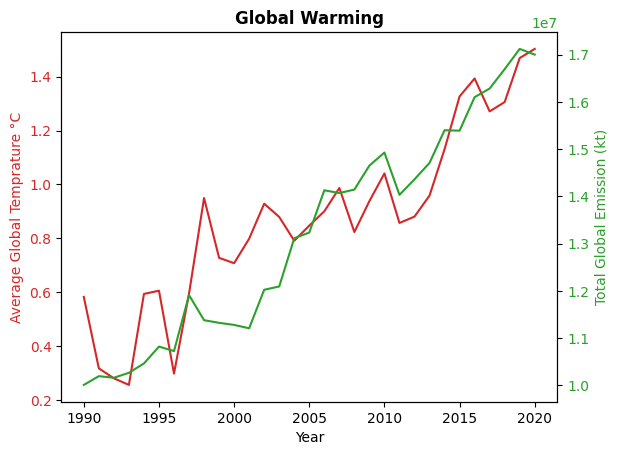

In [22]:
df_year = emissions_copy_df.groupby('Year')
avg_temp = df_year['Average_Temperature'].mean()
total_global_emission = df_year.sum()[['Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Rice_Cultivation', 
                                                           'Drained_organic_soils_(CO2)', 'Pesticides_Manufacturing', 'Food_Transport',
                                                           'Forestland', 'Net_Forest_conversion', 'Food_Household_Consumption', 
                                                           'Food_Retail', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 
                                                           'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 
                                                           'Manure_applied_to_Soils', 'Manure_left_on_Pasture', 'Manure_Management', 
                                                           'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests']].sum(axis=1)
x = avg_temp.index

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Global Temprature °C', color = color)
ax1.plot(x, avg_temp, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Global Emission (kt)', color = color)
ax2.plot(x, total_global_emission, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
plt.title('Global Warming', fontweight ="bold")
plt.show()

**Result:** Through analysis of the dataset spanning 30 years, we observed a clear linear relationship between total emissions and average temperature. As total emissions increased over the years, there was a corresponding rise in average temperature, indicating a significant relationship between agricultural activities and global warming

After assessing the total CO2 emissions for all included regions over the past 30 years, we would like to know which agricultural activities contribute the most to the CO2 emissions

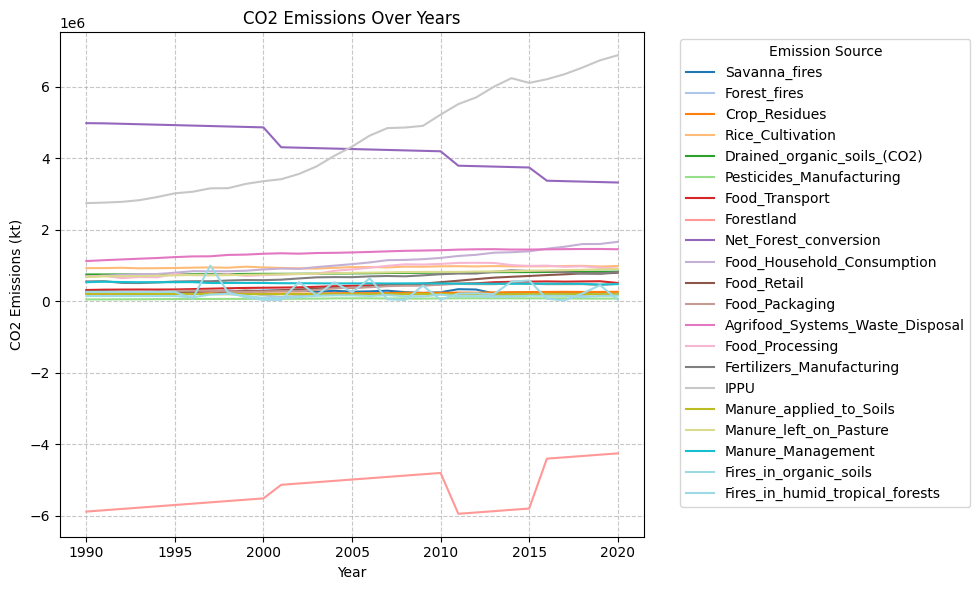

In [24]:
# Group the DataFrame by year and sum the CO2 emissions for each year
co2_emissions_by_year = emissions_copy_df.groupby('Year')[['Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Rice_Cultivation', 
                                                           'Drained_organic_soils_(CO2)', 'Pesticides_Manufacturing', 'Food_Transport',
                                                           'Forestland', 'Net_Forest_conversion', 'Food_Household_Consumption', 
                                                           'Food_Retail', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 
                                                           'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 
                                                           'Manure_applied_to_Soils', 'Manure_left_on_Pasture', 'Manure_Management', 
                                                           'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests']].sum()

# Generate a list of 21 distinct colors using a colormap
colors = plt.cm.get_cmap('tab20', 21)  # 'tab20' can be replaced with another colormap if desired

plt.figure(figsize=(10, 6))

# Plot each CO2 emission source with a unique color
for i, co2 in enumerate(co2_emissions_by_year.columns):
    plt.plot(co2_emissions_by_year.index, co2_emissions_by_year[co2], label=co2, color=colors(i))

plt.title('CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(title='Emission Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Results:** The line graph clearly depicts that `IPPU` and `Net_Forest_conversion` have consistently ranked as the primary sources of CO2 emissions. Notably, `IPPU` has consistently surpassed `Net_Forest_conversion` in emission levels in the last 15 years and this could be because of a number of reasons. 30 years is a very long time and things have improved, Technology has advanced, industries have expanded due to population growth leading to increased production therefore resulting in higher emissions. Conversely, `Forestland` emerges as the least significant contributor to CO2 emissions, aligning with the well-known fact that trees actively absorb CO2 during photosynthesis, thereby effectively storing carbon in their biomass and soil.

In [25]:
# Create a new column for the total population by summing male and female populations
emissions_copy_df['Total_population'] = emissions_copy_df['Total_Population_-_Male']
+ emissions_copy_df['Total_Population_-_Female']
emissions_copy_df.head()

,Region,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,...,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,Total_emission,Average_Temperature,Total_population
0,Asia,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,...,0.0,0.0,3101.166614,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,5348387.0
1,Asia,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,...,0.0,0.0,3101.166614,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,5372959.0
2,Asia,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,...,0.0,0.0,3101.166614,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,6028494.0
3,Asia,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,...,0.0,0.0,3101.166614,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,7003641.0
4,Asia,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,...,0.0,0.0,3101.166614,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,7733458.0


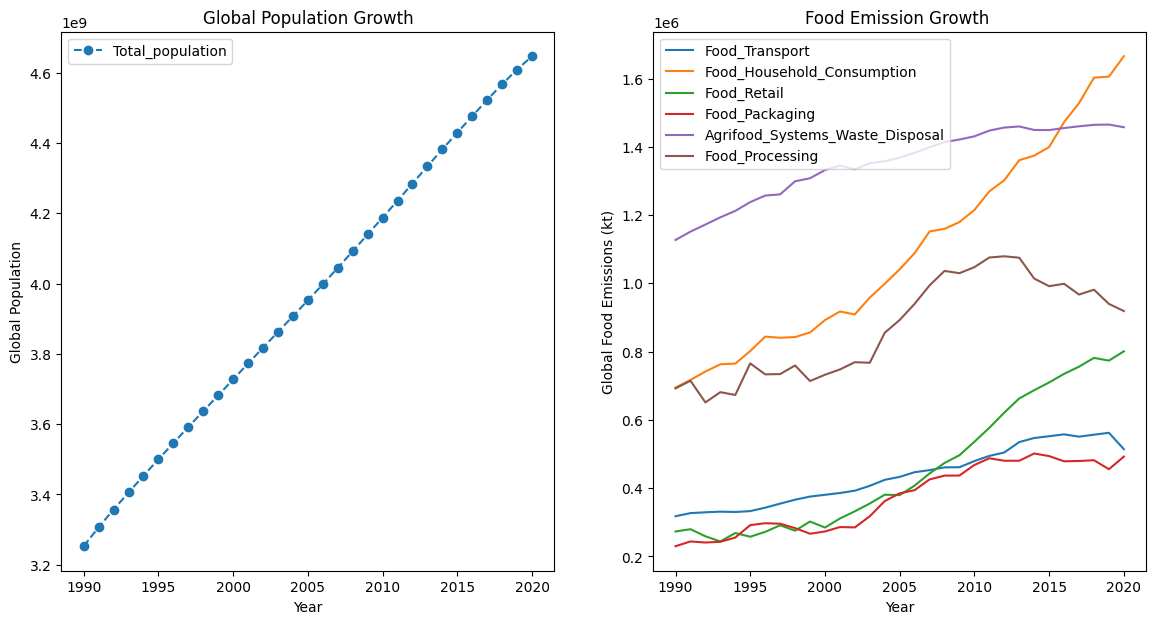

In [26]:
feat_pop = ['Total_population']
feat_co2 = ['Food_Transport', 'Food_Household_Consumption', 'Food_Retail', 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing']

df_year = emissions_copy_df.groupby('Year')

df_pop = df_year[feat_pop].sum()
df_food = df_year[feat_co2].sum()


fig, ax = plt.subplots(1, 2, figsize=(14,7))

ax1 = ax[0]
df_pop.plot(ax=ax1, marker='o', linestyle='dashed')
ax1.set_ylabel('Global Population')
ax1.set_title('Global Population Growth')
ax1.legend()

ax2 = ax[1]
df_food.plot(ax=ax2)
ax2.set_ylabel('Global Food Emissions (kt)')
ax2.set_title('Food Emission Growth ')
ax2.legend()

plt.show()

**Summary**- The purpose of this graph is to show that Food emissions have been increasing with an increase in population growth over the years. This growth has led to Industrial expansion and higher CO2 emissions leading temperature variations.

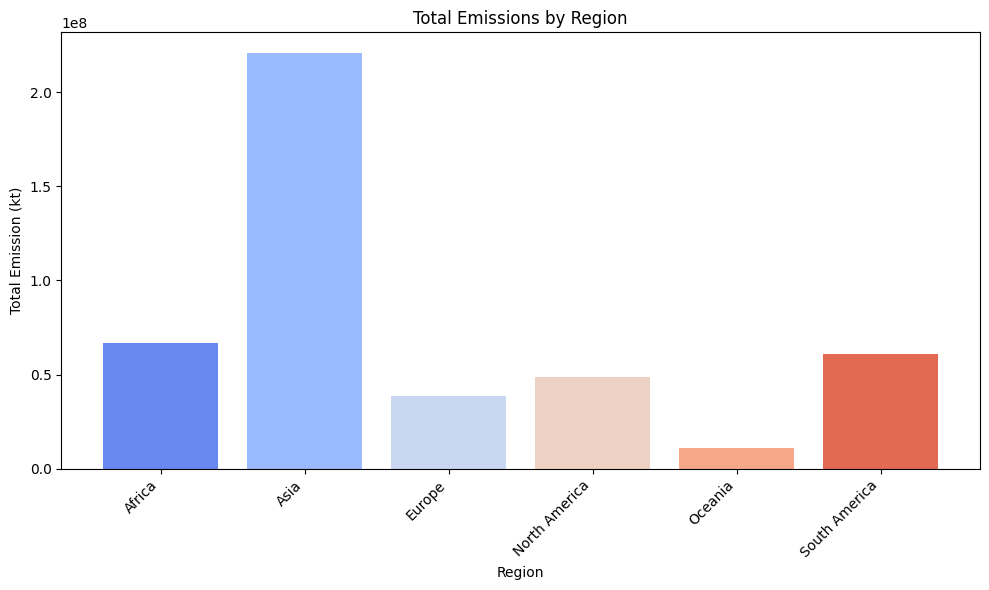

In [27]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Region' and calculate the sum of total emissions for each region
total_emission_by_region = emissions_copy_df.groupby('Region')['Total_emission'].sum()

# Get the 'coolwarm' color palette with as many colors as there are regions
colors = sns.color_palette("coolwarm", len(total_emission_by_region))

# Plot the total emissions by region using the 'coolwarm' color palette
plt.figure(figsize=(10, 6))
plt.bar(total_emission_by_region.index, total_emission_by_region.values, color=colors)
plt.xlabel('Region')
plt.ylabel('Total Emission (kt)')
plt.title('Total Emissions by Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Result:** After analyzing the total CO2 emissions by region for over 30 years, it is evident that Asia emerges as the largest contributor to global CO2 emissions. This could be because many countries in Asia still relies heavily on fossil fuels like coal, oil and natural gas to power and generate their industries, bearing in mind that Asia is the most populated continent in the world. This means that it faces increased production of goods and services to be able to cater for the population.

The `emissions_copy_df` contains both numeric and non-numeric columns but all input data needs to be numeric for regression model building purposes

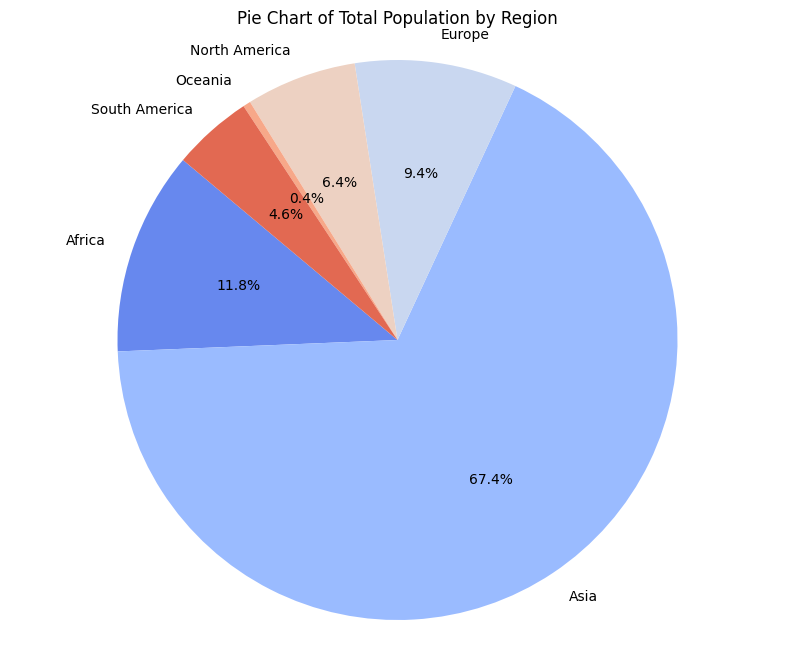

In [60]:
# Group the DataFrame by 'Region' and calculate the sum of total emissions for each region
total_population_by_region = emissions_copy_df.groupby('Region')['Total_population'].sum()

# Create the pie chart
plt.figure(figsize=(10, 8))

# Get the 'coolwarm' color palette with as many colors as there are regions
colors = sns.color_palette("coolwarm", len(total_population_by_region))

# Create the pie chart with the 'coolwarm' color palette
plt.pie(total_population_by_region, labels=total_population_by_region.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart of Total Population by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This Pie chart shows that Asia is the most populated continent with a total population of 66.6 %.

In [61]:
# Select only the columns with numeric data types from the DataFrame 'emissions_copy_df'
numerical_columns = emissions_copy_df.select_dtypes(include=['float64', 'int64'])

To identify relationships and  how strongly different numeric variables are related to each other, we use the correlation coefficient to measure the linear relationship between variables by using the `.corr()` function.

In [62]:
# Calculate the pairwise Pearson correlation coefficients between the numeric columns of the DataFrame 'emissions_copy_df'
correlation_matrix = emissions_copy_df.corr(numeric_only=True)

print(f"The Pearson correlation coefficients between the numeric columns are:\n {correlation_matrix}")

The Pearson correlation coefficients between the numeric columns are:
                                      Year  Savanna_fires  Forest_fires  \
Year                             1.000000      -0.011837     -0.008600   
Savanna_fires                   -0.011837       1.000000      0.507422   
Forest_fires                    -0.008600       0.507422      1.000000   
Crop_Residues                    0.016783       0.020887      0.064717   
Rice_Cultivation                 0.001641      -0.030696      0.070102   
Drained_organic_soils_(CO2)      0.004470       0.017081      0.108532   
Pesticides_Manufacturing         0.023444       0.060995      0.053580   
Food_Transport                   0.060122       0.070634      0.072024   
Forestland                       0.019397      -0.035253     -0.111078   
Net_Forest_conversion           -0.027510       0.215729      0.403072   
Food_Household_Consumption       0.048441       0.001739      0.019519   
Food_Retail                      0.093201

**Result:** Most of the features in the correlation_matrix show a weak correlation to `Average_Temperature` with Food_Transport being the highest at 0.075724.

To validate the insights from the correlation matrix, we create a heatmap to visualise the relationship between all the columns and how they correlate with `Average_Temperature`

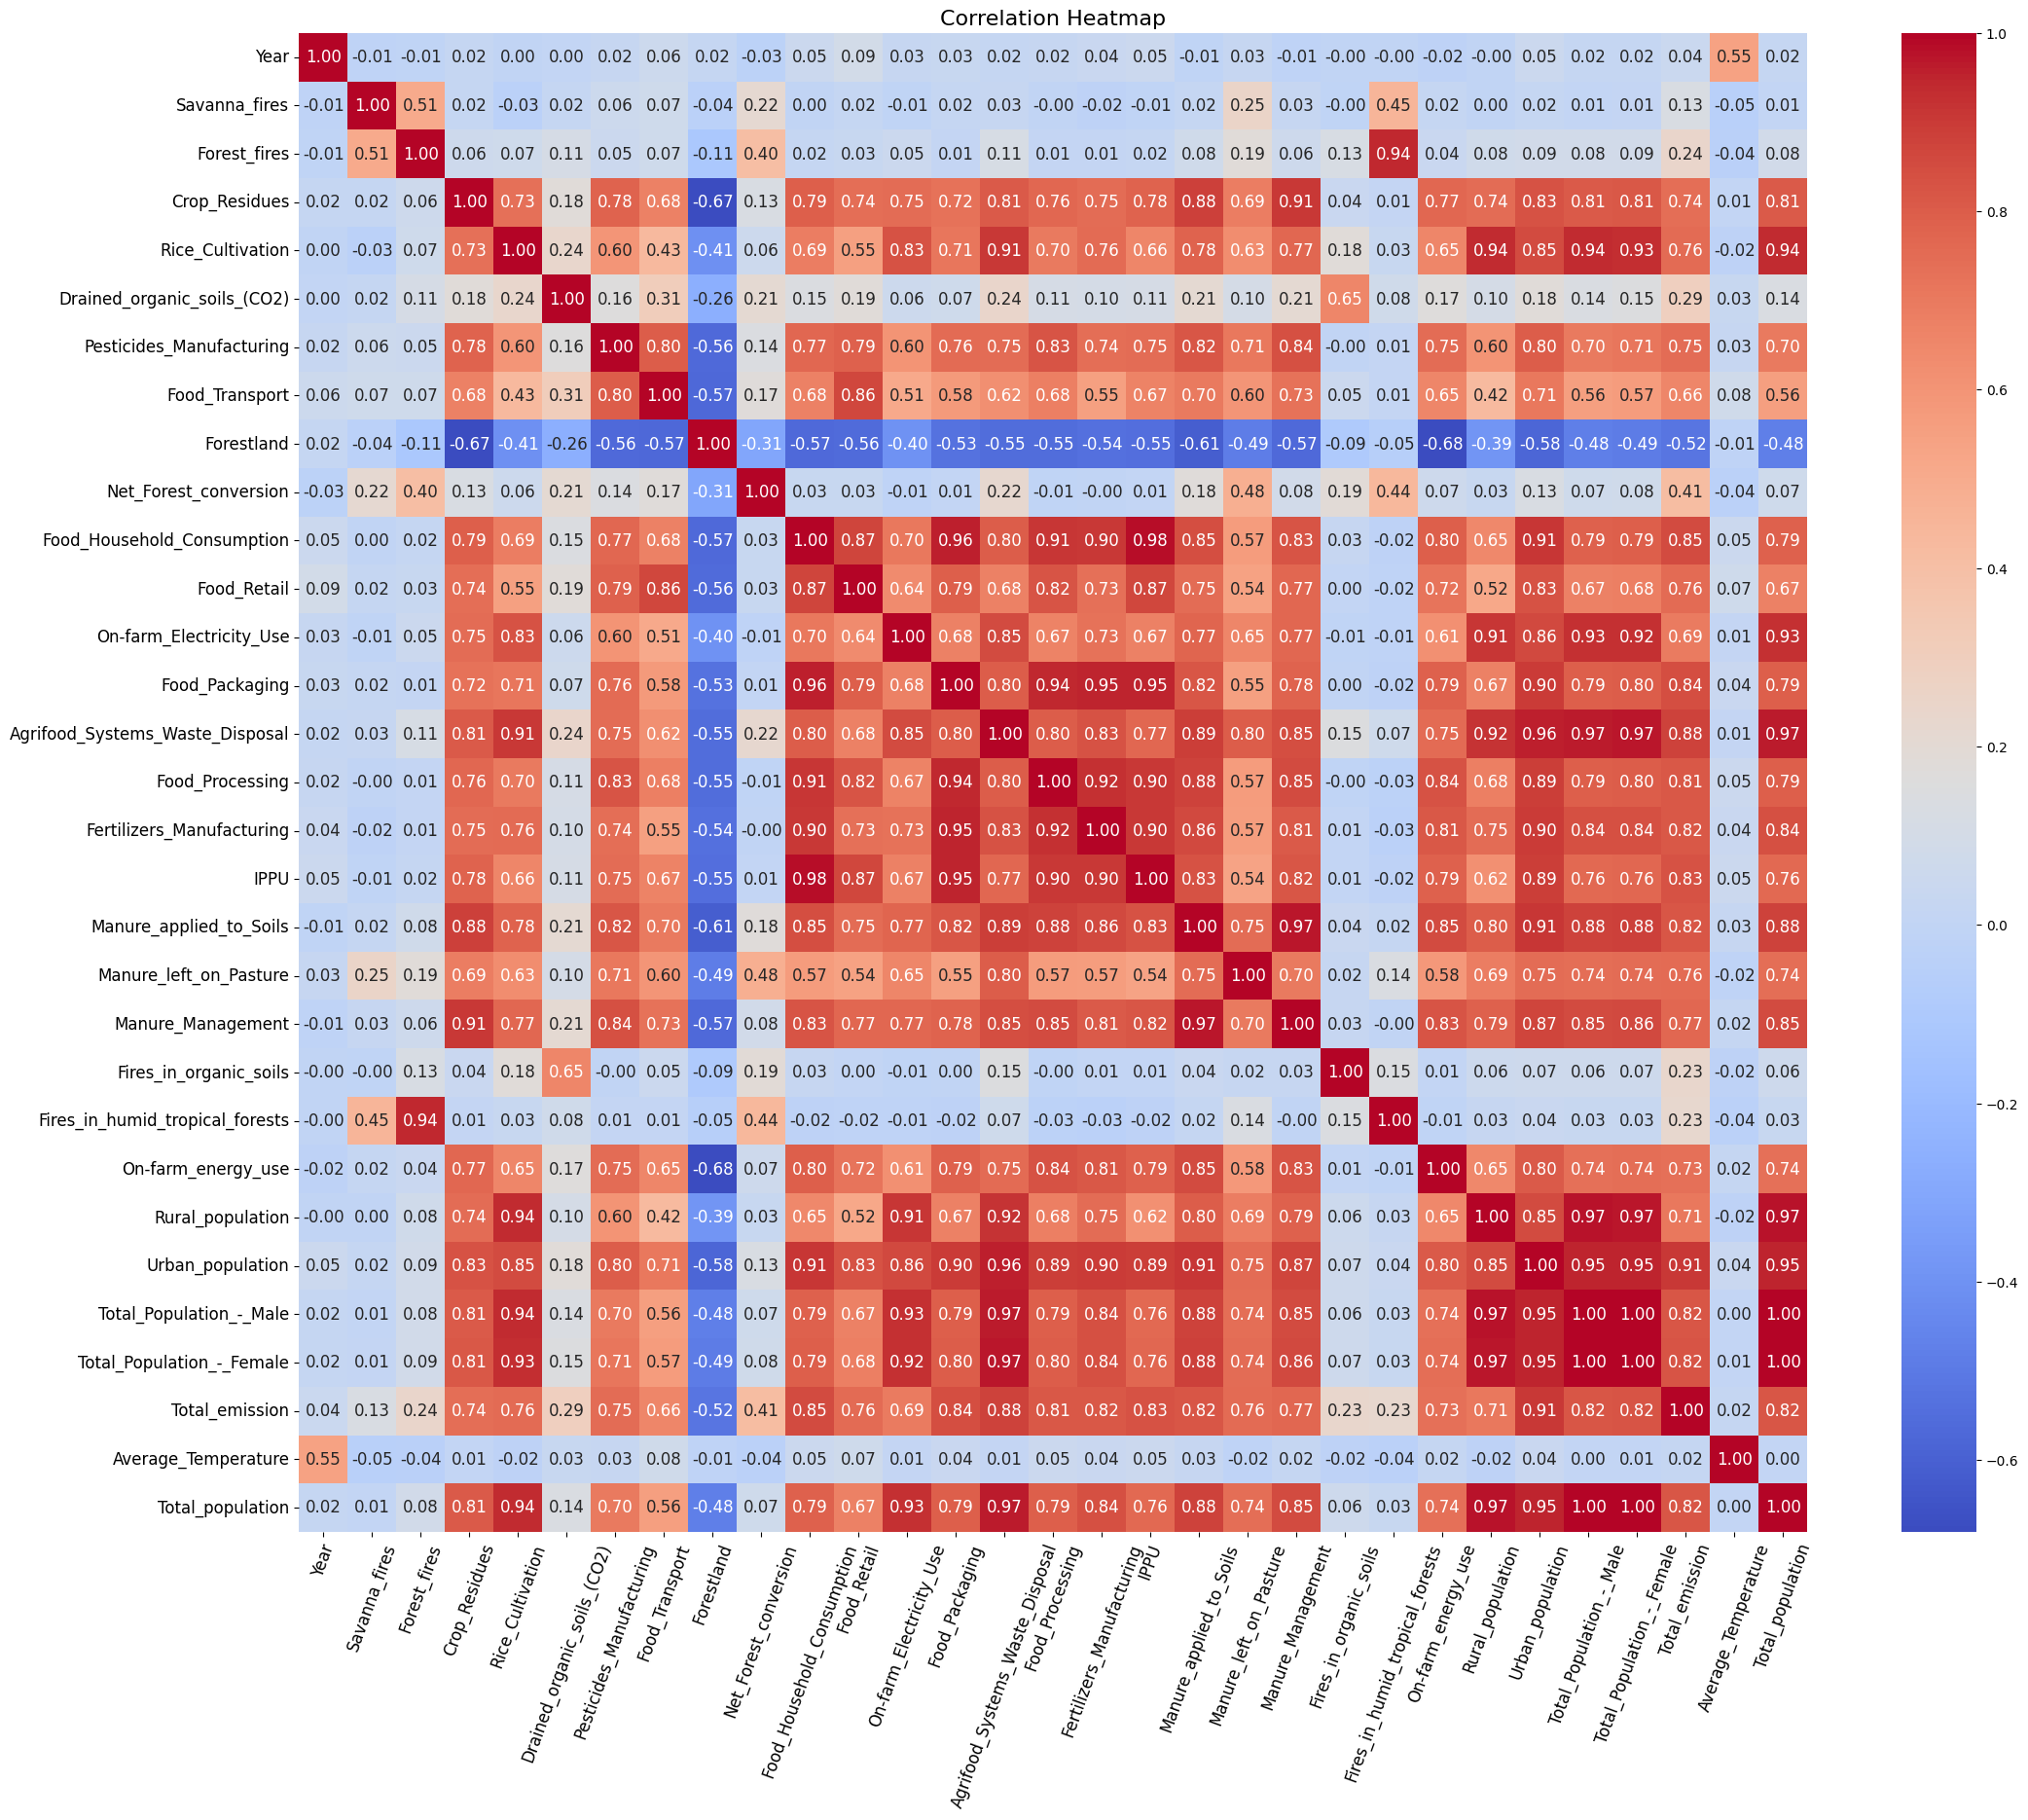

In [63]:
# Calculate the correlation matrix
corr = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))  # Adjust the size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize":12}) # Change the fontsize as needed
plt.title('Correlation Heatmap', fontsize=16) # Adjust title font size
plt.xticks(rotation=70, fontsize=12)  # Rotate x-axis labels by 70 degrees and adjust font size
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.show()

**Result:** The heatmap above validates what the  we got in the correlation_matrix, most of the features in the correlation_matrix show a weak correlation to `Average_Temperature`. The purpose of this heatmap is to show us the relationship and correlations between all the columns. Our main focus with this heatmap is to see the ralationship between average temperature and emission sources. Looking at the heatmap we can see that emission sources and Average temperature have a weak correlation, this tells us that there is little to no linear relationship between the two variables. This means that change in emission sources do not strongly predict temperature changes.

This sparks our interest of finding out which features correlate with `Average_Temperature` the most

In [64]:
# Sort the correlation coefficients in descending order
sorted_correlation_coefficients_df = emissions_copy_df.corr(numeric_only=True)['Average_Temperature'].sort_values(ascending=False)
print(f"The Correlation Coefficients in order:\n{sorted_correlation_coefficients_df}")

The Correlation Coefficients in order:
Average_Temperature                1.000000
Year                               0.545932
Food_Transport                     0.075724
Food_Retail                        0.073404
IPPU                               0.054064
Food_Processing                    0.053083
Food_Household_Consumption         0.049112
Fertilizers_Manufacturing          0.041462
Food_Packaging                     0.040767
Urban_population                   0.036263
Drained_organic_soils_(CO2)        0.029030
Manure_applied_to_Soils            0.028076
Pesticides_Manufacturing           0.027960
On-farm_energy_use                 0.019312
Total_emission                     0.019043
Manure_Management                  0.017874
On-farm_Electricity_Use            0.009081
Agrifood_Systems_Waste_Disposal    0.008995
Crop_Residues                      0.005626
Total_Population_-_Female          0.005456
Total_Population_-_Male            0.003623
Total_population                   0.

**Summary:** The features that correlate with `Average_Temperature_°C` the most are:
- Food_Transport
- Food_Retail
- IPPU
- Food_Processing

  These variables are driven by the rapid population growth. The population has grown significantly since 1990, and with the population growing industries had to expand because because the demand was getting too high so they had to increase production and all these results in higher CO2 emissions. 

## 6. Data Preprocessing <a class="anchor" id="chapter6"></a>

We prepare the data for modelling by splitting it into training and testing sets and scaling the features to help our models perform optimally.

In [67]:
# Separates the features from the response
X = numerical_columns.drop(['Average_Temperature'], axis=1) # Independent variable
y = numerical_columns['Average_Temperature'] # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Model training and evaluation <a class="anchor" id="chapter7"></a>

We developed a general function that we'll use to train and test the regression models we've selected. This will enhance re-usability and reduce redundancy.

In [68]:
def train_and_evaluate_model(model):
    """
    Train and evaluate a regression model.

    Parameters:
    model (sklearn.base.RegressorMixin): The regression model to be trained and evaluated.

    Returns:
    model (sklearn.base.RegressorMixin): The trained regression model.
    r2 (float): The R-squared value
    mse (float): The Mean Squared Error of the model's predictions
    """
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return model, r2, mse

### 7.1 Gradient Boosting Regressor model <a class="anchor" id="section_7_1"></a>

In [86]:
# Training and evaluating the GradientBoostingRegressor model
from sklearn import ensemble
GradientBoosting_model, GradientBoosting_r2, GradientBoosting_mse = train_and_evaluate_model(ensemble.GradientBoostingRegressor(n_estimators=100,
                                                                                                                                random_state=42))
print(f"The Gradient Boosting Regressor - R²: {GradientBoosting_r2}, MSE: {GradientBoosting_mse}")

The Gradient Boosting Regressor - R²: 0.5559279734066054, MSE: 0.13613935559841064


**Result:** The Gradient Boosting Regressor model has an R² of 0.5559 and an MSE of 0.1361. This indicates that the model explains around 55.59% of the variance in the target variable, which signifies a moderate level of explanatory power. While the MSE is relatively low, the R² value suggests that there may be other important factors not included in the model

### 7.2 Decision tree regression model <a class="anchor" id="section_7_2"></a>

We apply the previously defined function to train and evaluate a decision tree regression model. This allows us to explore the capabilities of a non-linear model in capturing the non-linear patterns we earlier observed in the data.

In [70]:
# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_mse = train_and_evaluate_model(DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 10, min_samples_split= 2))
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")

Decision tree regression - R²: 0.48916766940784073, MSE: 0.15660609122161104


**Result:** The Decision tree regression model has an R² of 0.2064 and an MSE of 0.2432. Compared to the Gradient Boosting Regressor model, the decision tree model explains a lower percentage of the variance in the target variable (20.64% vs. 55.59%) and has a higher mean squared error, indicating worse predictive performance and a poorer fit to the data. Despite this, the R² value still suggests that a significant portion of the variance in the target variable is not explained by the model.

### 7.3 Random forest regression model <a class="anchor" id="section_7_3"></a>

We apply the previously defined function to train and evaluate a random forest regression model due to it's capability of capturing complex non-linear relationships between features and the target variable, making them effective for a wide range of prediction tasks.

In [71]:
# Training and evaluating the random forest regression model
forest_model, forest_r2, forest_mse = train_and_evaluate_model(RandomForestRegressor(max_depth= 10, min_samples_leaf= 5, min_samples_split= 2))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")

Random Forest Regression - R²: 0.6206580995548157, MSE: 0.11629501248762517


**Result:** The random forest model explains a higher percentage of the variance in the target variable and has a lower mean squared error, indicating superior predictive performance and a better fit to the data. This improvement can be attributed to the ensemble nature of the random forest, which reduces overfitting and captures more complex relationships in the data. This suggests that it is a more robust and reliable model for this particular dataset compared to Decision Tree and Gradient Boosting Regressor. However, with an R² of 62.02%, 37.98% of the variance in the target variable remains unexplained, suggesting that there is still room for improvement.

We created a bar plot to show a clear comparison of the performance of the different regression methods we used (Gradient Boosting Regressor, Decision Tree Regression, and Random Forest Regression). This visualization allows for a quick comparison between the models in terms of their performance on both metrics. It helps in identifying which model performs better in terms of R² and MSE and provides insights into the relative strengths and weaknesses of each regression method.

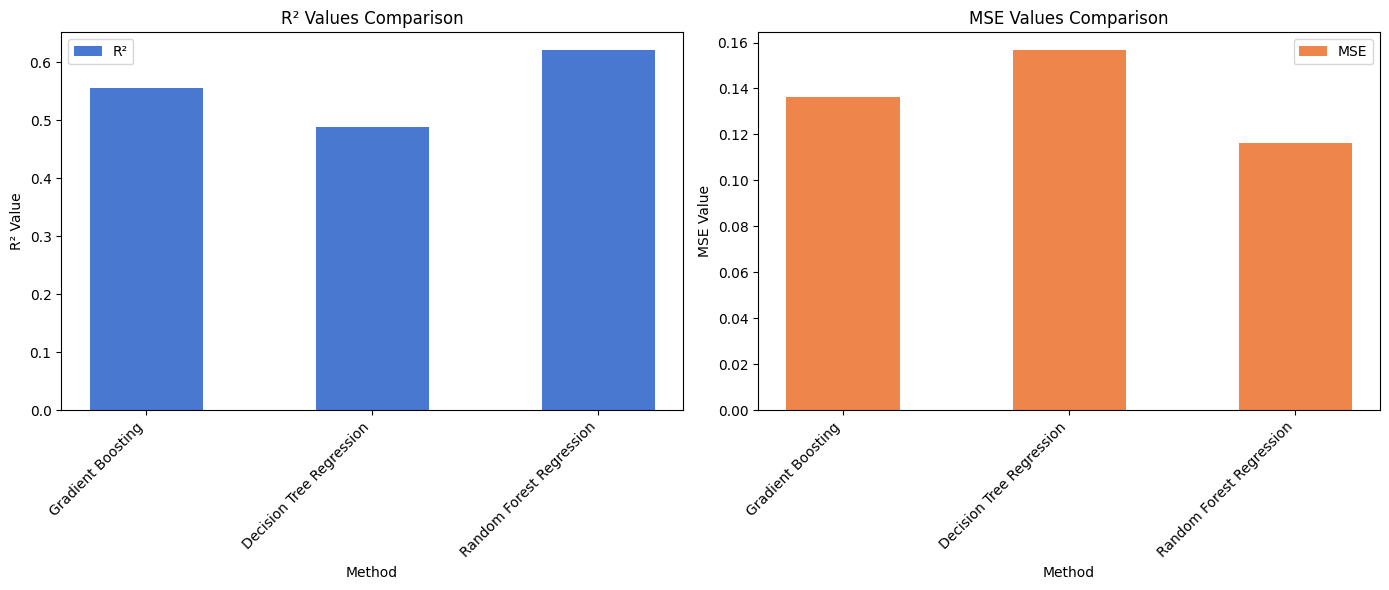

In [85]:
# Defines the data
methods = ['Gradient Boosting', 'Decision Tree Regression', 'Random Forest Regression']
r2_values = [0.5559279734066054, 0.48916766940784073, 0.6206580995548157]
mse_values = [0.13613935559841064, 0.156606091221611042, 0.11629501248762517]

# Creates the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Defines the bar width and positions
bar_width = 0.5
index = np.arange(len(methods))

# Choose a lukewarm color palette
colors = sns.color_palette("muted")

# Creates the bar plot for R² values
ax1.bar(index, r2_values, bar_width, color=colors[0], label='R²')
ax1.set_title('R² Values Comparison')
ax1.set_xlabel('Method')
ax1.set_ylabel('R² Value')
ax1.set_xticks(index)
ax1.set_xticklabels(methods, rotation=45, ha="right")

# Creates the bar plot for MSE values
ax2.bar(index, mse_values, bar_width, color=colors[1], label='MSE')
ax2.set_title('MSE Values Comparison')
ax2.set_xlabel('Method')
ax2.set_ylabel('MSE Value')
ax2.set_xticks(index)
ax2.set_xticklabels(methods, rotation=45, ha="right")

# Adds legends
ax1.legend()
ax2.legend()

# Shows the plot
plt.tight_layout()
plt.show()

**Result:** The visualization indicates that the Random Forest Regression model achieved the highest R² value compared to the Gradient Boosting Regressor model and Decision Tree Regression models. This suggests that the Random Forest model explains a larger proportion of the variance in the target variable compared to the other models.

## 8. Conclusion  <a class="anchor" id="chapter8"></a>

This project analyzed trends in CO2 emissions and temperature variations over 30 years, focusing on identifying significant agricultural contributors and developing predictive models. We aimed to understand the relationship between CO2 emissions and global temperature rise, pinpoint key emission sources, and propose actionable strategies for mitigation.

Our findings confirmed a strong correlation between CO2 emissions and temperature increases, emphasizing the impact of human activities on climate change. By adopting the recommended measures, we can effectively reduce CO2 emissions and promote sustainable agricultural practices. This will contribute to a healthier environment, mitigate the effects of climate change, and ensure a sustainable future for generations to come.

## 9. Recommenndations  <a class="anchor" id="chapter9"></a>

- Implement energy-efficient technologies: To reduce energy consumption and CO2 emissions.
- Transition to renewable energy sources: To decrease reliance on fossil fuels and lower carbon footprints.
- Enhance waste heat recovery systems: To capture and reuse waste heat, improving overall energy efficiency.
- Invest in carbon capture and storage technologies: To remove CO2 from the atmosphere and store it safely.
- Develop infrastructure for CO2 transport and storage: To support large-scale carbon capture and sequestration efforts.
- Use low-carbon materials: To reduce emissions from production and construction processes.
- Offer sustainable and locally sourced products: To lower emissions from transportation and promote local economies.